In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense

In [3]:
import pathlib
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\Img'
data_dir = tf.keras.utils.get_file('Chars', origin=dir, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir = dir
print(data_dir)

C:\Users\Afonso\anaconda3\envs\hello-tf\Img


In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.
Using 2728 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode = 'categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.
Using 682 files for validation.


In [6]:
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\ResNet50'
test_dir = os.path.join(dir,'test')

In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  label_mode = 'categorical',
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.


In [8]:
## Autotune 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=62,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(62, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 62)                31806     
                                                                 
Total params: 24,668,606
Trainable params: 1,080,894
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
loss0, accuracy0 = resnet_model.evaluate(val_ds)

C:\Users\Afonso\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 51s 2s/step - loss: 5.0061 - accuracy: 0.0132


In [14]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
86/86 [==============================] - 278s 3s/step - loss: 3.6037 - accuracy: 0.1778 - val_loss: 2.8936 - val_accuracy: 0.2713
Epoch 2/10
86/86 [==============================] - 299s 3s/step - loss: 2.2871 - accuracy: 0.4707 - val_loss: 2.1134 - val_accuracy: 0.4809
Epoch 3/10
86/86 [==============================] - 270s 3s/step - loss: 1.7075 - accuracy: 0.6045 - val_loss: 1.7676 - val_accuracy: 0.5469
Epoch 4/10
86/86 [==============================] - 310s 4s/step - loss: 1.3917 - accuracy: 0.6756 - val_loss: 1.5469 - val_accuracy: 0.5865
Epoch 5/10
86/86 [==============================] - 353s 4s/step - loss: 1.1996 - accuracy: 0.7097 - val_loss: 1.4067 - val_accuracy: 0.6290
Epoch 6/10
86/86 [==============================] - 316s 4s/step - loss: 1.0457 - accuracy: 0.7474 - val_loss: 1.2797 - val_accuracy: 0.6525
Epoch 7/10
86/86 [==============================] - 329s 4s/step - loss: 0.9453 - accuracy: 0.7687 - val_loss: 1.2143 - val_accuracy: 0.6598
Epoch 8/10
86

Mean Validation Accuracy: 0.586950147151947
Mean Training Accuracy:0.6574046924710274
Mean Validation Loss: 1.5524801850318908
Mean Training Loss:1.4512987196445466


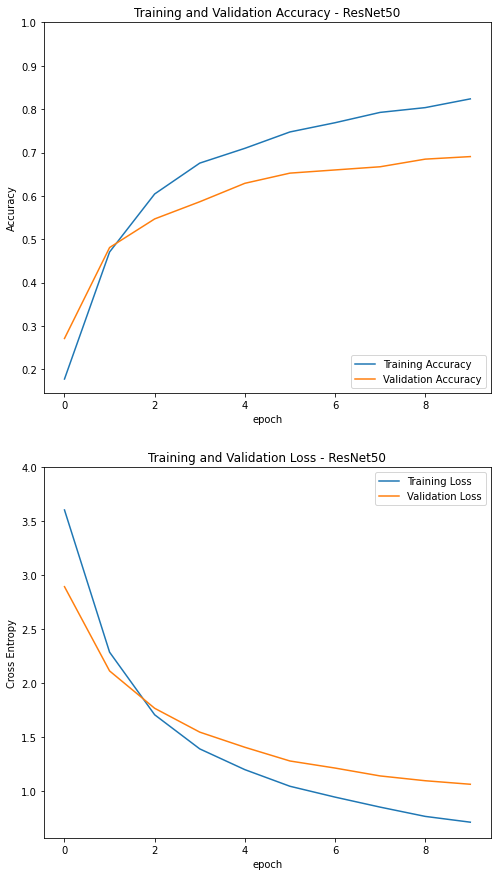

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))


plt.figure(figsize=(8, 15))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy - ResNet50')
plt.xlabel('epoch')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.ylim([min(plt.ylim()),4])
plt.title('Training and Validation Loss - ResNet50')
plt.xlabel('epoch')
plt.show()

In [16]:
## Fine Tunning 
resnet_model.trainable = True ##unfreeze top layers 

In [17]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(resnet_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 1

# Freeze all the layers before the `fine_tune_at` layer
for layer in resnet_model.layers[:fine_tune_at]:
        layer.trainable =  False

Number of layers in the base model:  4


In [18]:
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [19]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 62)                31806     
                                                                 
Total params: 24,668,606
Trainable params: 1,080,894
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
history_fine = resnet_model.fit(train_ds,
                         epochs=20,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
86/86 [==============================] - 325s 4s/step - loss: 0.6795 - accuracy: 0.8255 - val_loss: 1.0730 - val_accuracy: 0.6818
Epoch 11/20
86/86 [==============================] - 370s 4s/step - loss: 0.6153 - accuracy: 0.8493 - val_loss: 1.0316 - val_accuracy: 0.6979
Epoch 12/20
86/86 [==============================] - 324s 4s/step - loss: 0.5663 - accuracy: 0.8548 - val_loss: 0.9910 - val_accuracy: 0.7111
Epoch 13/20
86/86 [==============================] - 309s 4s/step - loss: 0.5282 - accuracy: 0.8651 - val_loss: 0.9974 - val_accuracy: 0.7214
Epoch 14/20
86/86 [==============================] - 332s 4s/step - loss: 0.4893 - accuracy: 0.8801 - val_loss: 0.9735 - val_accuracy: 0.7097
Epoch 15/20
86/86 [==============================] - 346s 4s/step - loss: 0.4593 - accuracy: 0.8845 - val_loss: 0.9266 - val_accuracy: 0.7434
Epoch 16/20
86/86 [==============================] - 343s 4s/step - loss: 0.4258 - accuracy: 0.8930 - val_loss: 0.9088 - val_accuracy: 0.7419
Epoch 

In [21]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

Mean Validation Accuracy: 0.7210077372464266
Mean Training Accuracy:0.8820981112393466
Mean Validation Loss: 0.9542999159206044
Mean Training Loss:0.47567064653743396


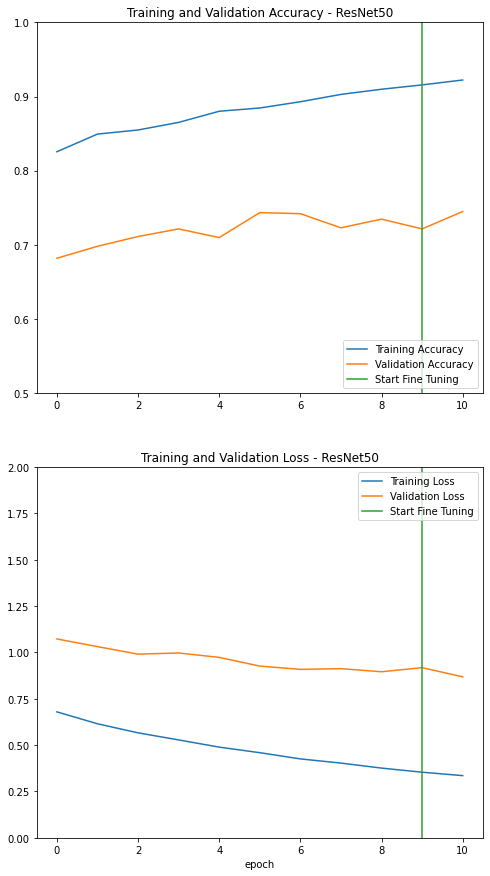

In [23]:
#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))



plt.figure(figsize=(8, 15))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - ResNet50')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - ResNet50')
plt.xlabel('epoch')
plt.show()

In [24]:
score = resnet_model.evaluate(test_ds)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

107/107 [==============================] - 295s 3s/step - loss: 0.4278 - accuracy: 0.8894
Test loss: 0.427775114774704
Test accuracy: 0.8894428014755249


In [25]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = resnet_model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#class_names = train_ds.class_names
#print(class_names)

#plt.figure(figsize=(10, 10))
#for i in range(9):
#  ax = plt.subplot(3, 3, i + 1)
#  plt.imshow(image_batch[i].astype("uint8"))
#  plt.title(class_names[predictions[i]])
#  plt.axis("off")

Predictions:
 [1 1 1 ... 1 1 1]
Labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
